# Diagnostics & Outliers

In [103]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from lab3_diagnostic_plots import plot
import numpy as np
import pandas as pd

sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [62]:
df = sm.datasets.get_rdataset('anscombe').data
df.head()

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47


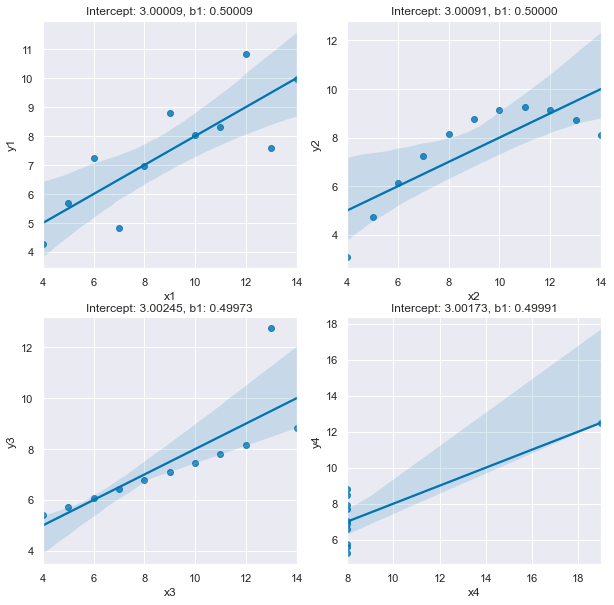

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
results = []
for i, ax in zip(range(1, 5), axes):
    X, y = df[f'x{i}'], df[f'y{i}']
    y, X = dmatrices(f'y{i} ~ x{i}', data=df, return_type='dataframe')
    res = sm.OLS(y, X).fit()
    results.append(res)
    f = sns.regplot(data=df, x=f'x{i}', y=f'y{i}', ax=ax)
    f.set(title='Intercept: %.5f, b1: %.5f' % (res.params[0], res.params[1]))

Regression 1


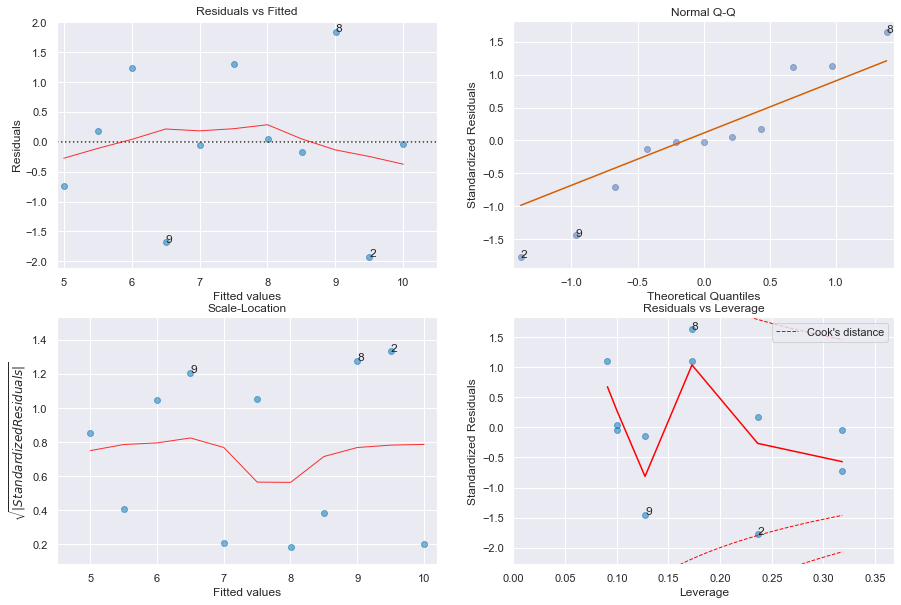

Regression 2


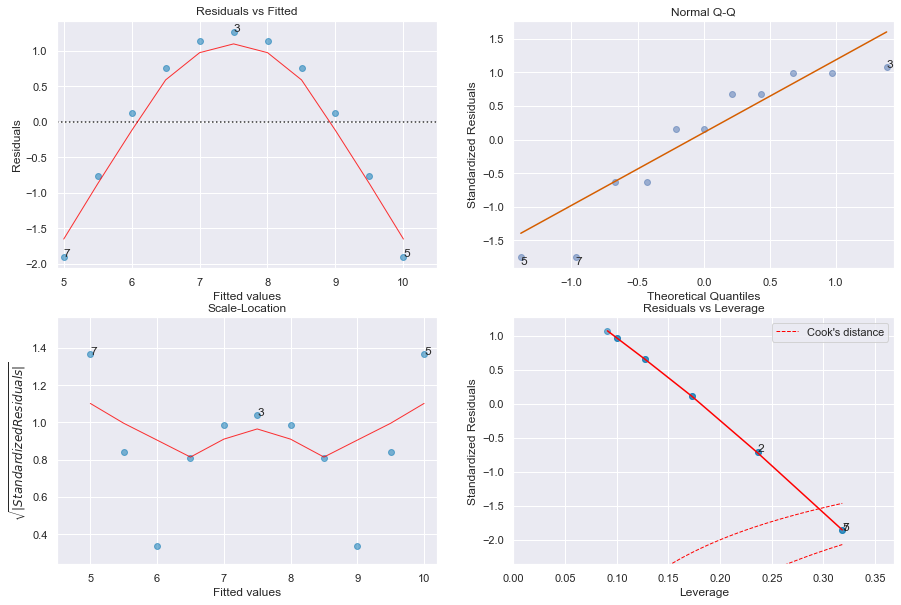

Regression 3


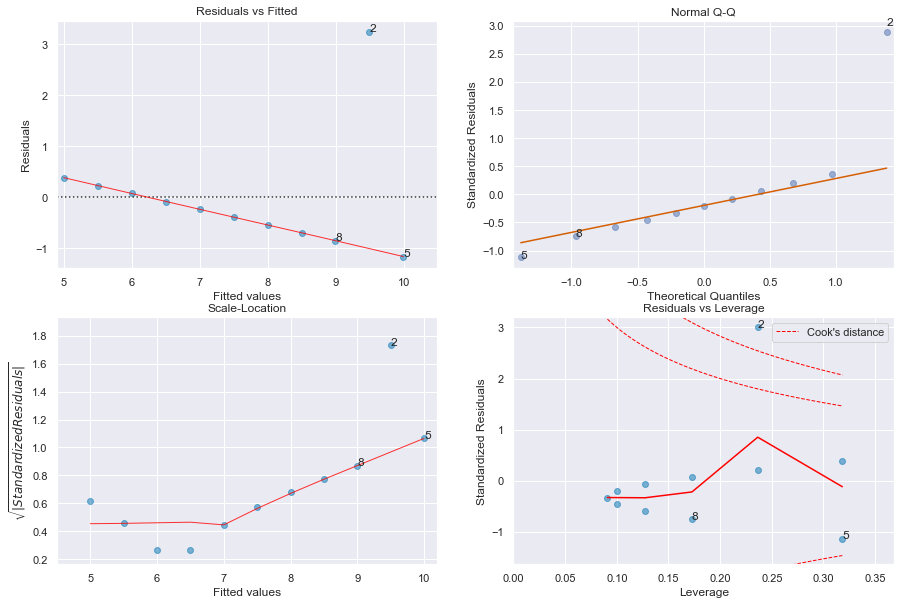

Regression 4


/Users/mathisbatoul/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
/Users/mathisbatoul/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:713: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/Users/mathisbatoul/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/mathisbatoul/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/Users/mathisbatoul/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=fra

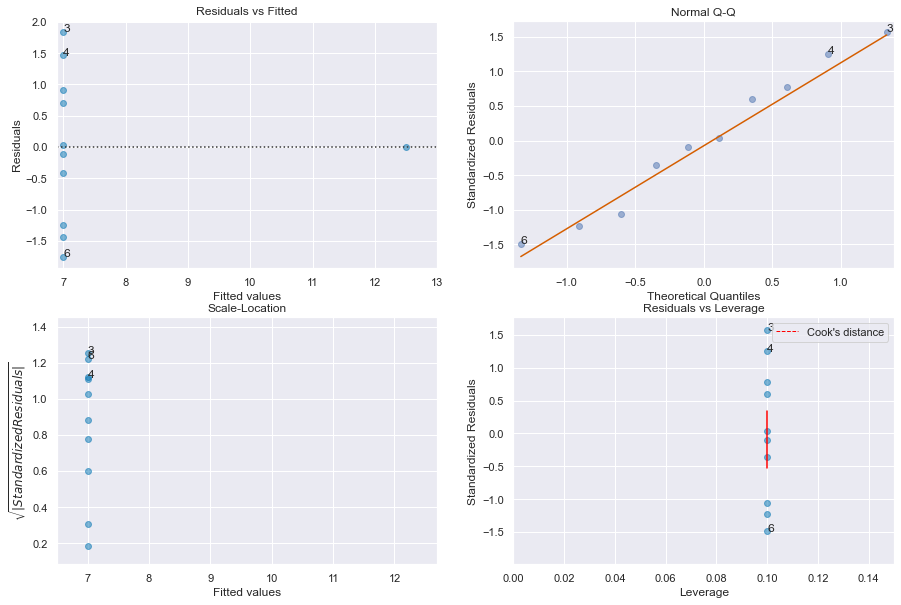

In [64]:
for i in range(len(results)):
    print(f'Regression {i + 1}')
    plot(results[i])

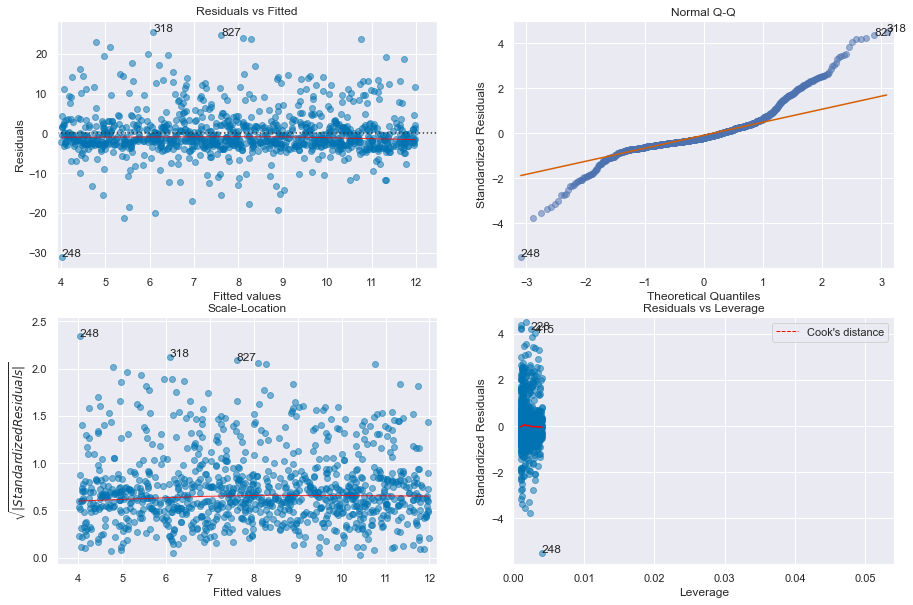

In [107]:
n = 1000
b0, b1 = 2, 7
X = np.random.uniform(size=n)
epsilon1 = np.random.normal(loc=3, scale=2, size=n)
epsilon2 = np.random.normal(loc=0, scale=1, size=n)
epsilon3 = np.random.normal(loc=5, scale=9, size=n)
epsilon = np.concatenate((epsilon1, epsilon2, epsilon3))
np.random.shuffle(epsilon)
epsilon = epsilon[:n]
y = b0 + b1 * X + epsilon
df = pd.DataFrame({'X': X, 'y': y, 'epsilon': epsilon})
y, X = dmatrices('y ~ X', data=df, return_type='dataframe')
res = sm.OLS(y, X).fit()
plot(res)